In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('all_data.csv')

In [3]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
data.shape

(96, 4)

In [5]:
data.tail()

,Country,Year,Life expectancy at birth (years),GDP
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10
95,Zimbabwe,2015,60.7,1.630467e+10


In [6]:
data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [7]:
data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [8]:
data.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [9]:
data.isnull().values.any()

False

In [10]:
data.isna().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

### Make the colums accessbile with quick accesss

In [11]:
# camel_case = lambda col: col.replace(" ", "_")
# data.columns = map(camel_case, data.columns)
data.columns = data.columns.str.replace(" ", "_").str.lower()
data.rename(columns={"life_expectancy_at_birth_(years)": "life_expectancy"}, inplace=True)
data.head()

,country,year,life_expectancy,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [12]:
data[['country', 'life_expectancy', 'gdp']].groupby('country').mean().reset_index()

,country,life_expectancy,gdp
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

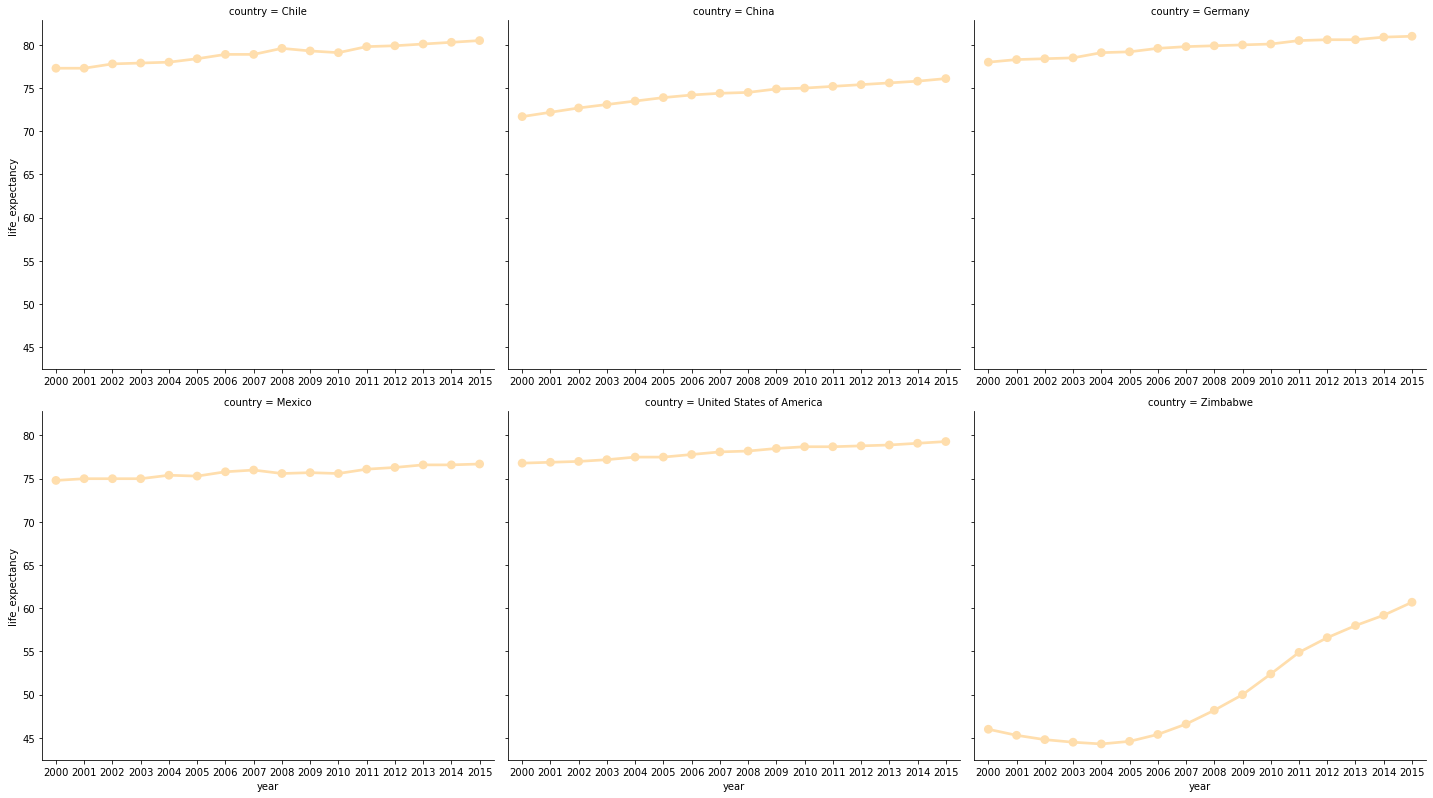

In [14]:
sns.catplot(x='year',y='life_expectancy', col='country', data=data, kind='point', col_wrap=3, color='navajowhite', height=5.5, aspect=1.2, sharex=False)
plt.show()

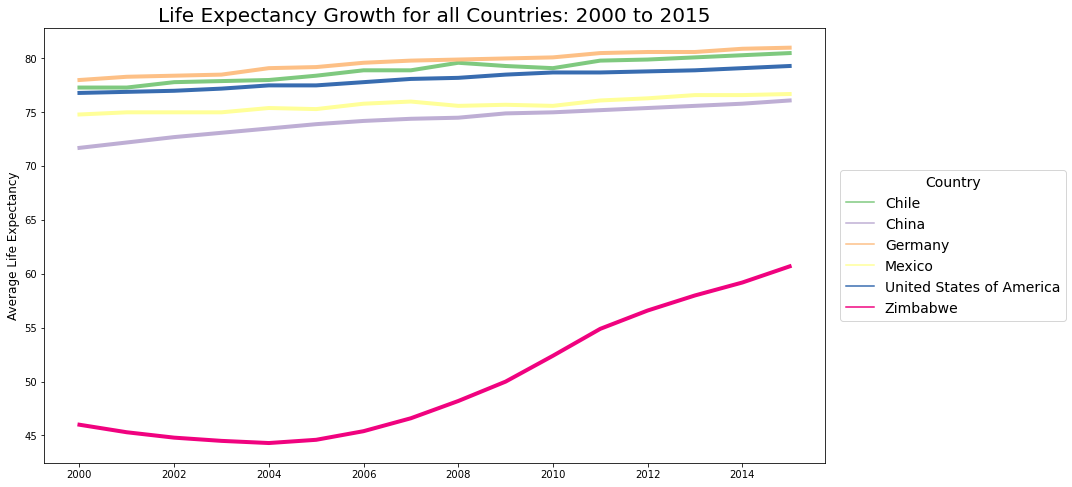

In [15]:
plt.figure(figsize=(14, 8))
ax = sns.lineplot(x='year', y='life_expectancy', hue='country', data=data, palette='Accent', linewidth=4)
ax.set_title(f'Life Expectancy Growth for all Countries: 2000 to 2015', fontsize=20)
ax.set_xlabel("")
ax.set_ylabel("Average Life Expectancy", fontsize=12)
# xticks = ax.get_xticks()
# ax.set_xticks(xticks)
# xticklabels = ax.get_xticklabels()
# ax.set_xticklabels(xticklabels, fontsize=12)
ax.legend(loc='center left',bbox_to_anchor=(1.01, 0.5), title='Country', title_fontsize=14, prop={'size': 14})
fig = plt.gcf()
fig.set_facecolor('white')
plt.savefig('life_expec_all.png', bbox_inches='tight', dpi=250)

plt.show()

In [16]:
# sns.catplot(x='year',y='gdp', col='country', data=data[data.country != "United States of America"], kind='bar', col_wrap=3, color='wheat', height=5.5, aspect=1.2, sharex=False)
# plt.show()

In [17]:
pd.DataFrame(data.country.unique(), columns=['country'])

,country
0,Chile
1,China
2,Germany
3,Mexico
4,United States of America
5,Zimbabwe


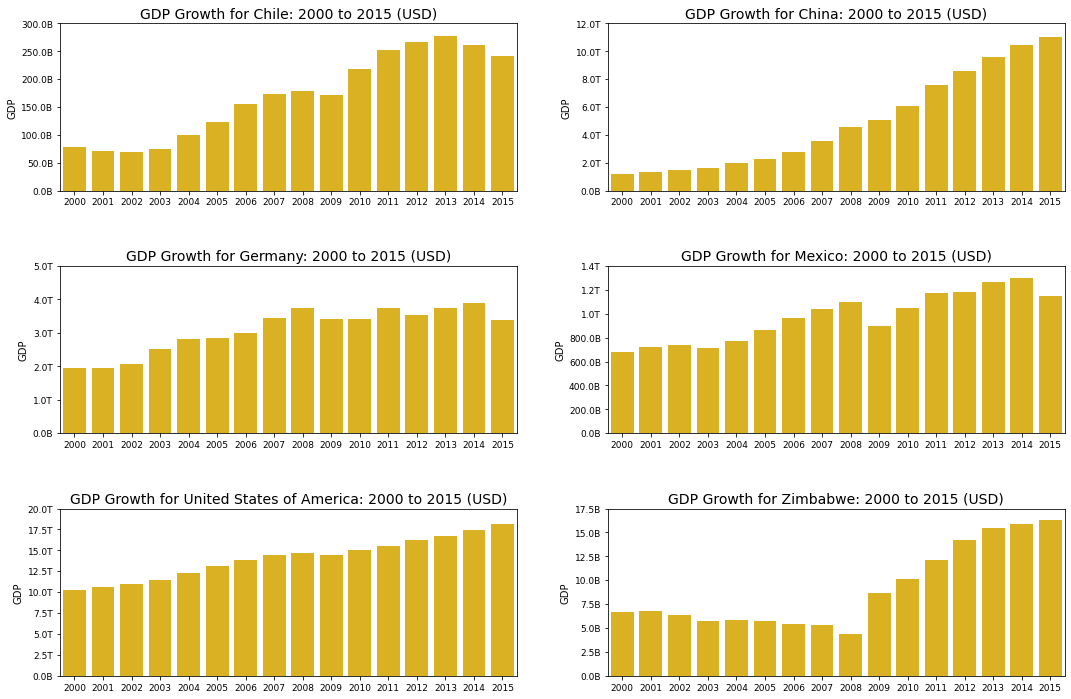

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12), gridspec_kw={'hspace': 0.45, 'wspace': 0.2})
# figsize=(18,12)
for c, country_name in enumerate(data.country.unique()):
#     plt.figure(figsize=(9,4))
    col = c % 2
    if c < 2:
        row = 0
    elif c < 4:
        row = 1
    else:
        row = 2
    country_data = data[data.country == country_name]
    ax = axes[row, col]
    sns.barplot(x='year', y='gdp', data=country_data, ax=ax, color='#FAC205')
    
    converter = lambda x: f'{(x / 1e9):.1f}B' if x < 1e12 else f'{(x / 1e12):.1f}T'
    yticks = ax.get_yticks()
    xticks = ax.get_xticklabels()
    ylabel = [converter(y) for y in yticks]
    
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabel, fontsize=9)
    ax.set_xticklabels(xticks, fontsize=9)
    ax.set_title(f'GDP Growth for {country_name}: 2000 to 2015 (USD)', fontsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("GDP")

fig.set_facecolor('white')
plt.savefig('gdp_by_country.png', bbox_inches='tight', dpi=250)
plt.show()


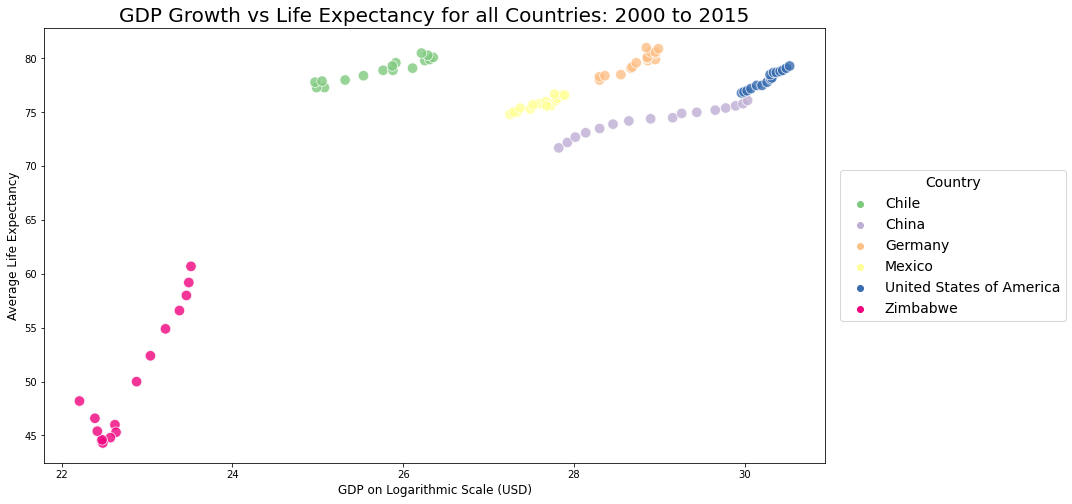

In [21]:
data['log_gdp'] = np.log(data['gdp'])
plt.figure(figsize=(14,8))
sns.scatterplot(x='log_gdp', y='life_expectancy', hue='country', data=data, palette='Accent', s=110, alpha=0.8)
plt.title(f'GDP Growth vs Life Expectancy for all Countries: 2000 to 2015', fontsize=20)
plt.xlabel("GDP on Logarithmic Scale (USD)", fontsize=12)
plt.ylabel("Average Life Expectancy", fontsize=12)
plt.legend(loc='center left',bbox_to_anchor=(1.01, 0.5), title='Country', prop={'size': 14}, title_fontsize=14)

fig = plt.gcf()
fig.set_facecolor('white')
plt.savefig('gdp_life_expec_all_countries.png', bbox_inches='tight', dpi=250)
plt.show()

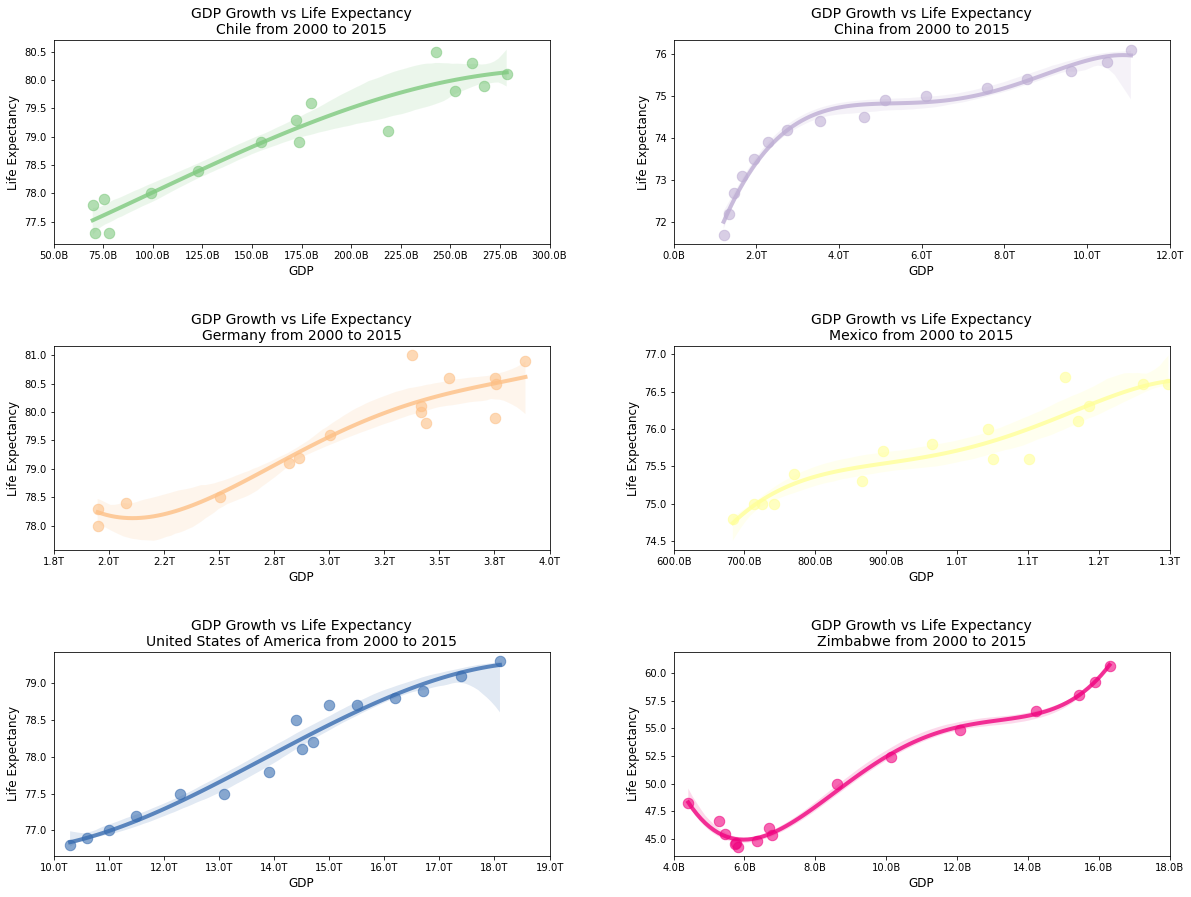

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(20,15), gridspec_kw={'hspace': 0.5, 'wspace': 0.25})
color_map = plt.cm.Accent
for c, country_name in enumerate(data.country.unique()):
#     plt.figure(figsize=(9,4))
    col = c % 2
    if c < 2:
        row = 0
    elif c < 4:
        row = 1
    else:
        row = 2
    country_data = data[data.country == country_name]
    ax = axes[row, col]
    colour = color_map(c)
    sns.regplot(x='gdp', y='life_expectancy', data=country_data, ax=ax, order=4, ci=75, scatter_kws={'s': 110, 'alpha': 0.6}, line_kws={'linewidth': 4, 'alpha': 0.8}, color=colour)

    converter = lambda x: f'{(x / 1e9):.1f}B' if x < 1e12 else f'{(x / 1e12):.1f}T'
    xticks = ax.get_xticks()
    xlabel = [converter(x) for x in xticks]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabel)
    ax.set_title(f'GDP Growth vs Life Expectancy\n{country_name} from 2000 to 2015', fontsize=14)
    ax.set_xlabel("GDP", fontsize=12)
    ax.set_ylabel("Life Expectancy", fontsize=12)

fig.set_facecolor('white')
plt.savefig('gdp_life_expec_seperate.png', bbox_inches='tight', dpi=250)
plt.show()